**Forecasting the number of Covid-19 cases**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import fbprophet
import datetime 
import warnings
warnings.filterwarnings('ignore')

In [5]:
train=pd.read_csv('/content/drive/MyDrive/train.csv')

In [6]:
train.head()

countyFIPS  ...  adult_icu_bed_utilization_SD
0        1001  ...                           0.0
1        1003  ...                           0.0
2        1005  ...                           0.0
3        1007  ...                           0.0
4        1009  ...                           0.0

[5 rows x 82 columns]

In [8]:
train.tail()

countyFIPS  ...  adult_icu_bed_utilization_SD
1179370       56037  ...                      0.372263
1179371       56039  ...                      0.372263
1179372       56041  ...                      0.372263
1179373       56043  ...                      0.372263
1179374       56045  ...                      0.372263

[5 rows x 82 columns]

In [10]:
train.shape

(1179375, 82)

In [11]:
case=train.groupby('countyFIPS')['confirmed_cases'].sum().sort_values(ascending=True).to_frame()

In [15]:
world=train.groupby('countyFIPS')['confirmed_cases'].sum().reset_index()

In [16]:
world.style.background_gradient(cmap='Blues_r')

In [42]:
world=train.groupby('countyFIPS')['deaths'].sum().reset_index()

In [44]:
world.style.background_gradient(cmap='Reds')

In [12]:
case.style.background_gradient(cmap='Blues_r')

In [53]:
death_case=train.groupby('countyFIPS')['deaths'].sum().sort_values(ascending=True).tail(20).to_frame()

In [54]:
death_case.style.background_gradient(cmap='Reds')

In [17]:
from fbprophet import Prophet

In [18]:
confirmed=train.groupby('date').sum()['confirmed_cases'].reset_index()

In [20]:
confirmed

date  confirmed_cases
0    2020-01-22                1
1    2020-01-23                1
2    2020-01-24                2
3    2020-01-25                2
4    2020-01-26                5
..          ...              ...
370  2021-01-26         24898024
371  2021-01-27         25052330
372  2021-01-28         25204611
373  2021-01-29         25368551
374  2021-01-30         25519353

[375 rows x 2 columns]

In [22]:
confirmed.columns=['ds','y']

In [23]:
confirmed['ds']=pd.to_datetime(confirmed['ds'])

In [24]:
model=Prophet(interval_width=0.95)

In [25]:
model.fit(confirmed)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
future=model.make_future_dataframe(periods=7)

In [29]:
future

ds
0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
..         ...
377 2021-02-02
378 2021-02-03
379 2021-02-04
380 2021-02-05
381 2021-02-06

[382 rows x 1 columns]

In [30]:
pred=model.predict(future)

In [31]:
pred

ds         trend  ...  multiplicative_terms_upper          yhat
0   2020-01-22 -4.413575e+03  ...                         0.0 -7.494596e+03
1   2020-01-23 -4.259408e+03  ...                         0.0 -3.726770e+03
2   2020-01-24 -4.105241e+03  ...                         0.0  2.009842e+02
3   2020-01-25 -3.951073e+03  ...                         0.0  1.876208e+03
4   2020-01-26 -3.796906e+03  ...                         0.0 -3.491166e+03
..         ...           ...  ...                         ...           ...
377 2021-02-02  2.636855e+07  ...                         0.0  2.636300e+07
378 2021-02-03  2.656989e+07  ...                         0.0  2.656681e+07
379 2021-02-04  2.677124e+07  ...                         0.0  2.677177e+07
380 2021-02-05  2.697259e+07  ...                         0.0  2.697689e+07
381 2021-02-06  2.717393e+07  ...                         0.0  2.717976e+07

[382 rows x 16 columns]

In [33]:
pred[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
377 2021-02-02  2.636300e+07  2.618707e+07  2.652828e+07
378 2021-02-03  2.656681e+07  2.639804e+07  2.674046e+07
379 2021-02-04  2.677177e+07  2.659712e+07  2.694821e+07
380 2021-02-05  2.697689e+07  2.680188e+07  2.715525e+07
381 2021-02-06  2.717976e+07  2.698514e+07  2.737198e+07

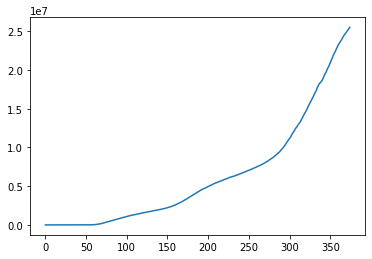

In [34]:
confirmed['y'].plot()

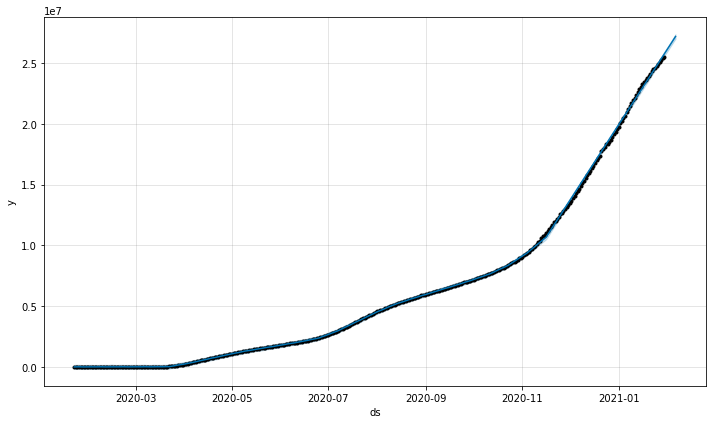

In [35]:
confirmed_forecast=model.plot(pred)

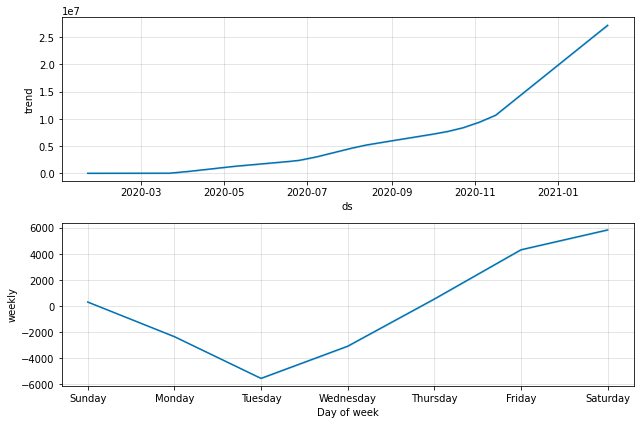

In [38]:
confirmed_forecast_plot=model.plot_components(pred)

In [40]:
death=train.groupby('date').sum()['deaths'].reset_index()

In [41]:
death

date  deaths
0    2020-01-22       0
1    2020-01-23       0
2    2020-01-24       0
3    2020-01-25       0
4    2020-01-26       0
..          ...     ...
370  2021-01-26  415144
371  2021-01-27  419150
372  2021-01-28  423048
373  2021-01-29  426673
374  2021-01-30  429595

[375 rows x 2 columns]

In [55]:
death.columns=['ds','y']

In [56]:
death['ds']=pd.to_datetime(death['ds'])

In [57]:
m=Prophet(interval_width=0.95)

In [58]:
m.fit(death)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [59]:
future=m.make_future_dataframe(periods=7)

In [60]:
future

ds
0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
..         ...
377 2021-02-02
378 2021-02-03
379 2021-02-04
380 2021-02-05
381 2021-02-06

[382 rows x 1 columns]

In [61]:
forecast=m.predict(future)

In [62]:
forecast

ds          trend  ...  multiplicative_terms_upper           yhat
0   2020-01-22     -42.703949  ...                         0.0     -22.399413
1   2020-01-23     -44.914661  ...                         0.0     237.824681
2   2020-01-24     -47.125374  ...                         0.0     392.091333
3   2020-01-25     -49.336087  ...                         0.0     369.656233
4   2020-01-26     -51.546799  ...                         0.0    -273.402127
..         ...            ...  ...                         ...            ...
377 2021-02-02  423741.131351  ...                         0.0  423389.987519
378 2021-02-03  426175.507990  ...                         0.0  426195.812526
379 2021-02-04  428609.884629  ...                         0.0  428892.623971
380 2021-02-05  431044.261268  ...                         0.0  431483.477975
381 2021-02-06  433478.637906  ...                         0.0  433897.630226

[382 rows x 16 columns]

In [63]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
377 2021-02-02  423389.987519  418199.776478  429386.659309
378 2021-02-03  426195.812526  420715.297210  432061.026485
379 2021-02-04  428892.623971  422622.676140  434799.732208
380 2021-02-05  431483.477975  425281.611087  437694.726176
381 2021-02-06  433897.630226  428026.716071  439972.857602

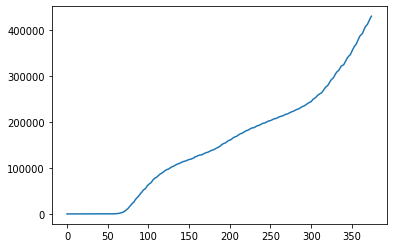

In [64]:
death['y'].plot()

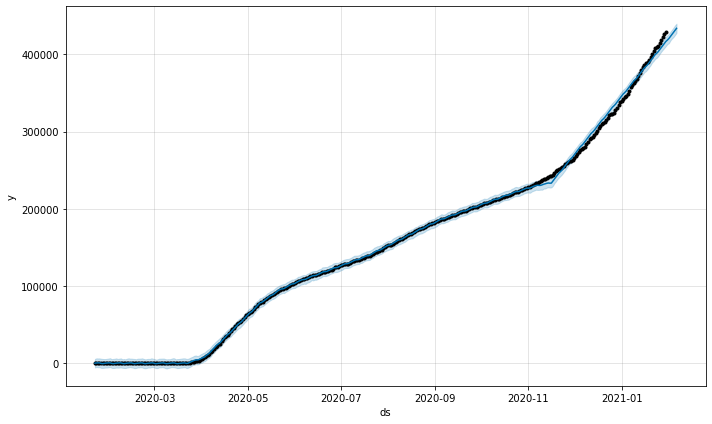

In [65]:
death_forecast=m.plot(forecast)

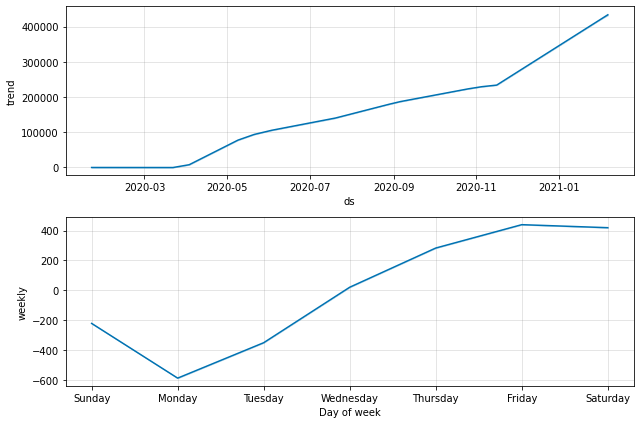

In [67]:
death_forecastplot=m.plot_components(forecast)